# **Import Libraries and modules**

In [0]:
# https://keras.io/
#!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


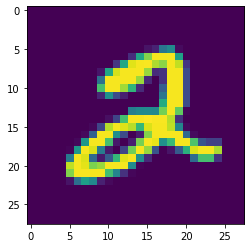

In [30]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[5])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [33]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [35]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [51]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(10, 3, 3, activation='relu', use_bias=False, input_shape=(28,28,1))) #26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(32, 3, 3, activation='relu',use_bias=False)) #24
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(MaxPooling2D(pool_size=(2,2))) #12

model.add(Convolution2D(10, 1, 1, activation='relu',use_bias=False)) #12
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False)) #10
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False)) #8
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False)) #6
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(20, 3, 3, activation='relu',use_bias=False)) #4
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu',use_bias=False)) #4
model.add(BatchNormalization())

model.add(Convolution2D(10, 4, use_bias=False))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", use_bias=False, input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", use_bias=False)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
/usr/local/lib/python3.6/dist

In [52]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_49 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_41 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 24, 24, 32)        2880      
_________________________________________________________________
batch_normalization_50 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_42 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)       

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.01 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(lr=0.01),
             metrics=['accuracy'])

In [57]:
model.fit(X_train, Y_train, batch_size=128, epochs=19,verbose = 1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/19

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
60000/60000 [==============================] - 10s 160us/step - loss: 0.0391 - acc: 0.9876 - val_loss: 0.0272 - val_acc: 0.9905
Epoch 2/19

Epoch 00002: LearningRateScheduler setting learning rate to 0.0075815011.
60000/60000 [==============================] - 9s 153us/step - loss: 0.0344 - acc: 0.9893 - val_loss: 0.0367 - val_acc: 0.9889
Epoch 3/19

Epoch 00003: LearningRateScheduler setting learning rate to 0.0061050061.
60000/60000 [==============================] - 9s 153us/step - loss: 0.0305 - acc: 0.9906 - val_loss: 0.0251 - val_acc: 0.9927
Epoch 4/19

Epoch 00004: LearningRateScheduler setting learning rate to 0.005109862.
60000/60000 [==============================] - 10s 160us/step - loss: 0.0297 - acc: 0.9906 - val_loss: 0.0268 - val_acc: 0.9916
Epoch 5/19

Epoch 00005: LearningRateScheduler setting learning rate to 0.0043936731.
60000/60000 [======

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [59]:
print(score)

[0.020125768811634408, 0.9944]


In [0]:
y_pred = model.predict(X_test)

In [61]:
print(y_pred[:9])
print(y_test[:9])

[[2.07196917e-13 6.17105977e-10 5.25009258e-10 1.18633314e-09
  3.79389315e-12 5.20779036e-12 1.03623205e-15 1.00000000e+00
  8.73340029e-14 2.63319642e-08]
 [5.52637758e-08 1.25031765e-05 9.99983907e-01 9.41485556e-09
  6.78396077e-08 4.17952090e-10 2.68476606e-06 1.83027254e-07
  5.81039558e-07 1.87367433e-09]
 [1.03510416e-10 9.99999404e-01 3.90252879e-08 7.20650969e-11
  1.12396961e-07 8.71338002e-10 2.10111661e-08 4.27757755e-07
  1.13791661e-08 9.72220704e-09]
 [9.99988675e-01 7.59755522e-11 9.26556076e-09 1.87620808e-09
  5.74056962e-08 3.21971161e-09 9.91022080e-06 5.56783331e-09
  1.78594703e-07 1.17781269e-06]
 [2.26005643e-13 7.52947482e-10 2.24154403e-10 1.18706992e-13
  9.99991536e-01 2.60728613e-12 3.23591887e-09 3.85603975e-08
  4.54622739e-09 8.42586087e-06]
 [1.43014545e-10 9.99998808e-01 1.60308513e-08 4.89472438e-12
  1.58957491e-07 4.89736064e-11 3.83223675e-09 1.00102056e-06
  4.93918462e-09 2.02078461e-08]
 [1.05249262e-12 6.51397372e-08 2.76917239e-10 5.10500192e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

IndexError: ignored

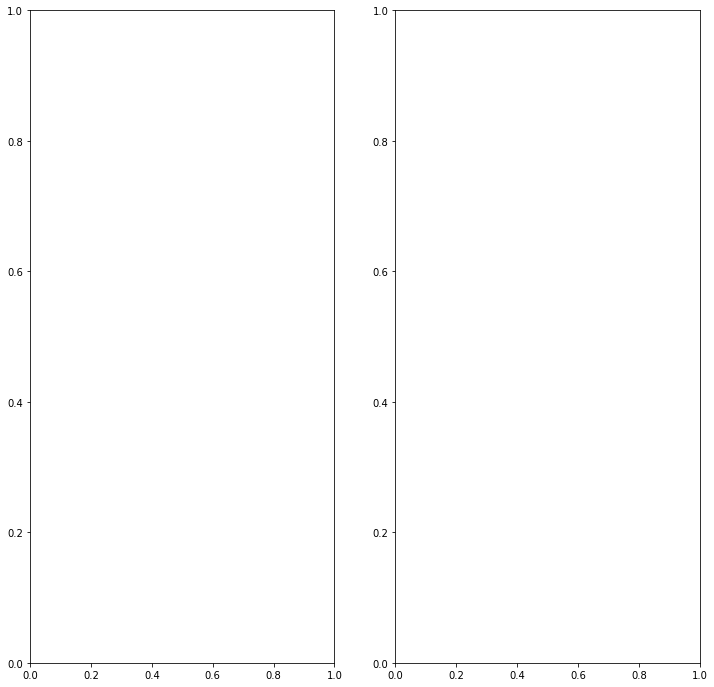

In [65]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float32), 
                      layer_name = 'conv2d_55'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()